In [5]:
import numpy as np
import pandas as pd 

import tensorflow as tf
from tensorflow import keras

In [34]:
df = pd.read_csv('diabetes_data_upload.csv')

# dummy encoding
encoding_cols = [i for i in list(df.columns) if i not in ['Age']]
df = pd.get_dummies(df, columns=encoding_cols,drop_first=True)

df.head()

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,class_Positive
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


## Train Test Split

In [36]:
from sklearn.model_selection import train_test_split

X = df.drop(['class_Positive'], axis=1)
y = df['class_Positive']

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25)

In [37]:
X_train

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes
40,53,0,0,1,1,0,1,1,1,1,1,1,0,1,0,0
296,48,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0
462,57,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
117,45,0,1,1,0,1,1,0,1,1,1,1,1,1,0,0
372,72,1,1,0,0,0,1,0,1,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,53,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0
107,47,1,1,0,1,1,1,0,0,0,0,1,1,1,0,0
464,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
341,43,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1


In [38]:
X_train.shape[1:]

(16,)

# ANN Model

In [50]:
model = keras.models.Sequential([
    keras.layers.Dense(100,activation="relu",input_shape = X_train.shape[1:]),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(1,activation='sigmoid') # for binary classification
])

model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs=100,
                   validation_data=(X_val, y_val))

Train on 292 samples, validate on 98 samples
Epoch 1/100
292/292 [==============================] - 0s 949us/sample - loss: 0.8628 - accuracy: 0.5890 - val_loss: 0.9173 - val_accuracy: 0.3776
Epoch 2/100
292/292 [==============================] - 0s 144us/sample - loss: 0.6902 - accuracy: 0.5856 - val_loss: 0.8583 - val_accuracy: 0.6224
Epoch 3/100
292/292 [==============================] - 0s 99us/sample - loss: 0.7190 - accuracy: 0.5925 - val_loss: 0.7065 - val_accuracy: 0.6224
Epoch 4/100
292/292 [==============================] - 0s 127us/sample - loss: 0.6743 - accuracy: 0.5788 - val_loss: 0.6860 - val_accuracy: 0.5918
Epoch 5/100
292/292 [==============================] - 0s 163us/sample - loss: 0.6662 - accuracy: 0.6130 - val_loss: 0.8976 - val_accuracy: 0.3776
Epoch 6/100
292/292 [==============================] - 0s 159us/sample - loss: 0.6876 - accuracy: 0.5993 - val_loss: 0.9059 - val_accuracy: 0.3776
Epoch 7/100
292/292 [==============================] - 0s 121us/sample - l

292/292 [==============================] - 0s 176us/sample - loss: 0.5725 - accuracy: 0.6986 - val_loss: 0.6169 - val_accuracy: 0.7143
Epoch 57/100
292/292 [==============================] - 0s 126us/sample - loss: 0.5771 - accuracy: 0.6952 - val_loss: 0.7343 - val_accuracy: 0.6224
Epoch 58/100
292/292 [==============================] - 0s 120us/sample - loss: 0.5942 - accuracy: 0.6849 - val_loss: 0.5968 - val_accuracy: 0.6224
Epoch 59/100
292/292 [==============================] - 0s 96us/sample - loss: 0.5639 - accuracy: 0.7432 - val_loss: 0.5822 - val_accuracy: 0.8367
Epoch 60/100
292/292 [==============================] - 0s 103us/sample - loss: 0.5569 - accuracy: 0.7534 - val_loss: 0.7301 - val_accuracy: 0.4490
Epoch 61/100
292/292 [==============================] - 0s 112us/sample - loss: 0.5660 - accuracy: 0.7295 - val_loss: 0.5653 - val_accuracy: 0.7449
Epoch 62/100
292/292 [==============================] - 0s 101us/sample - loss: 0.5585 - accuracy: 0.7808 - val_loss: 0.7065 -

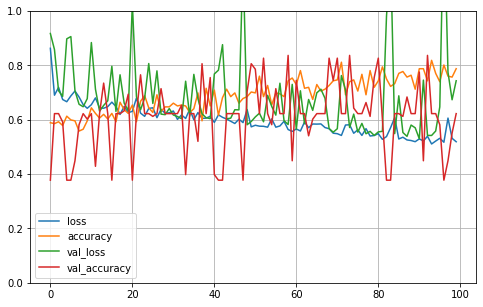

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set vertical range to [0-1]
plt.show()